<a href="https://www.kaggle.com/code/amirmotefaker/sentiment-analysis-on-tiktok?scriptVersionId=128424082" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
- TikTok is one of the most popular social media apps today. It is famous for its short videos. People often use this app to watch entertaining and funny videos. Despite its entertaining content, this application is not liked by everyone. If you skim through its reviews, you’ll find a mixture of hate and support for TikTok all over the world. Let’s analyze TikTok reviews to find out what people feel about the content of this app.

# Dataset

- TikTok, known in China as Douyin (Chinese: 抖音; pinyin: Dǒuyīn), is a video-focused social networking service owned by Chinese company ByteDance Ltd. It hosts a variety of short-form user videos, from genres like pranks, stunts, tricks, jokes, dance, and entertainment with durations from 15 seconds to ten minutes.

- TikTok is an international version of Douyin, which was originally released in the Chinese market in September 2016.

- TikTok was launched in 2017 for iOS and Android in most markets outside of mainland China; however, it became available worldwide only after merging with another Chinese social media service, Musical.ly, on 2 August 2018.

- TikTok and Douyin have almost the same user interface but no access to each other's content. Their servers are each based in the market where the respective app is available. The two products are similar, but features are not identical. Douyin includes an in-video search feature that can search by people's faces for more videos of them and other features such as buying, booking hotels and making geo-tagged reviews. Since its launch in 2016, TikTok and Douyin rapidly gained popularity in virtually all parts of the world. As of October 2020, TikTok surpassed over 2 billion mobile downloads worldwide.[Wikipedia](https://en.wikipedia.org/wiki/TikTok)

- This dataset belongs to the TikTok app available on the Google Play Store. The Dataset mostly has user reviews and the various comments made by the users.

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Read Data

In [2]:
data = pd.read_csv("/kaggle/input/tiktok-google-play-store-review/tiktok_google_play_reviews.csv")

/tmp/ipykernel_20/873023293.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/kaggle/input/tiktok-google-play-store-review/tiktok_google_play_reviews.csv")


In [3]:
print(data.head())

                               reviewId              userName  \
0  68ccaec8-1415-4301-a85e-3004679a3a83          Cassie Moore   
1  d84cbfd3-6aa3-485c-aaf9-c5dca27dc966         Kaleb Plummer   
2  96618aa1-31e5-4259-8649-89b75d962f00           Rylee Maher   
3  078c0bda-598b-474e-a04e-d7cb3e6f6301  Kittykatelyn Romilly   
4  8e68c5cd-b12a-4206-a8da-6bfdbff44ae3      Loveness Malenga   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ALm5wu...   
1  https://play-lh.googleusercontent.com/a-/ACNPE...   
2  https://play-lh.googleusercontent.com/a/ALm5wu...   
3  https://play-lh.googleusercontent.com/a-/ACNPE...   
4  https://play-lh.googleusercontent.com/a-/ACNPE...   

                                             content  score  thumbsUpCount  \
0                                           No words      5              0   
1                              Great fun app so far!      5              0   
2  The app would get a higher rating b

- On the first impressions of this dataset, I can see null values in some columns. To analyze TikTok reviews, we only need two columns, content, and score.
- Let’s create a new dataset with just these two columns and take a step further with TikTok reviews sentiment analysis:

In [4]:
data = data[["content", "score"]]
print(data.head())

                                             content  score
0                                           No words      5
1                              Great fun app so far!      5
2  The app would get a higher rating but I litera...      1
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...      5
4                                Pictures and record      5


- Let’s see whether any of these two columns contain any null values:


In [5]:
print(data.isnull().sum())

content    16
score       0
dtype: int64


- So there are 16 null values in the content column. Let’s drop the null values and move further:

In [6]:
data = data.dropna()

- Now let’s prepare this data for the task of sentiment analysis. 

- Here we have to clean the text in the content column:

In [7]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

- Let’s have a look at the percentages of ratings given to TikTok on the Google Play store:

In [8]:
ratings = data["score"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

- You can see that 73.6% of the users have given five ratings to TikTok, and 13.5% of the users have rated it with 1. 

- Let’s have a look at the kind of words the users use in the reviews of TikTok:

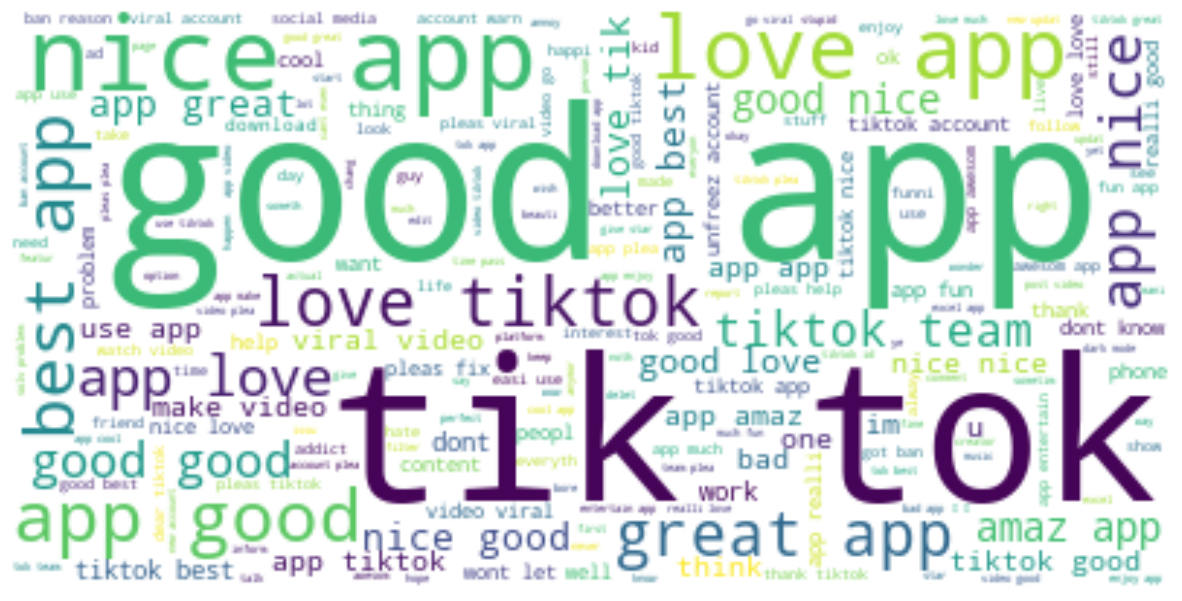

In [9]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets:

In [10]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
                                             content  Positive  Negative  \
0                                               word     0.000      0.00   
1                                  great fun app far     0.787      0.00   
2  app would get higher rate liter cant sign seco...     0.000      0.07   
3             wish could give  percent rate love 💕 😘     0.633      0.00   
4                                      pictur record     0.000      0.00   

   Neutral  
0    1.000  
1    0.213  
2    0.930  
3    0.367  
4    1.000  


- Now let’s have a look at the kind of words people use in the positive reviews of TikTok:

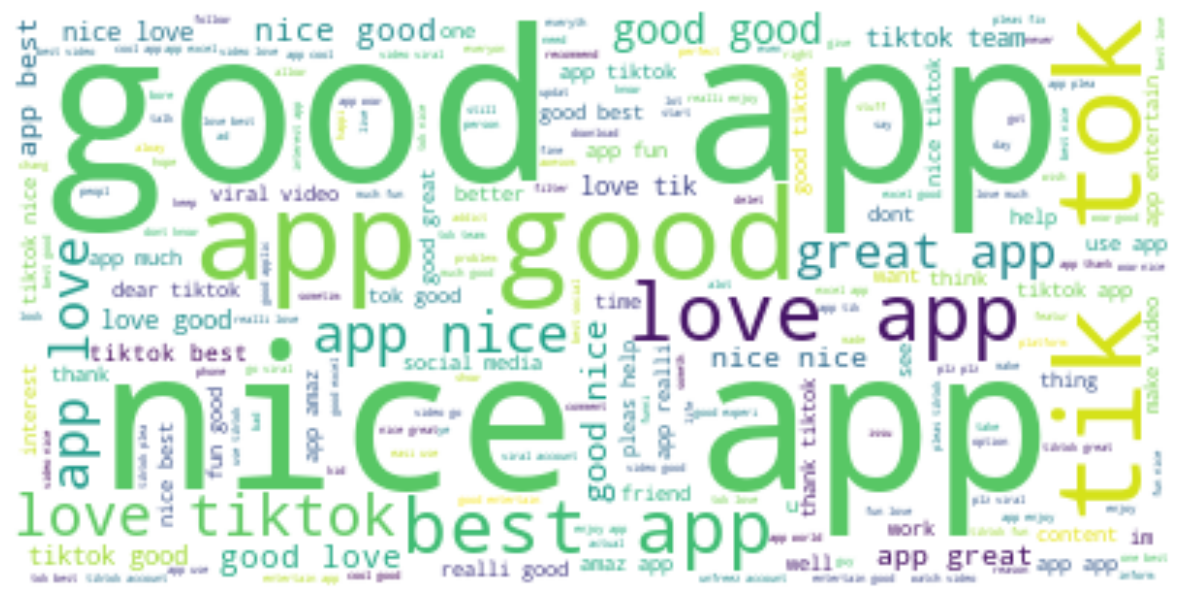

In [11]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- Now let’s have a look at the kind of words people often use in the negative reviews of TikTok:

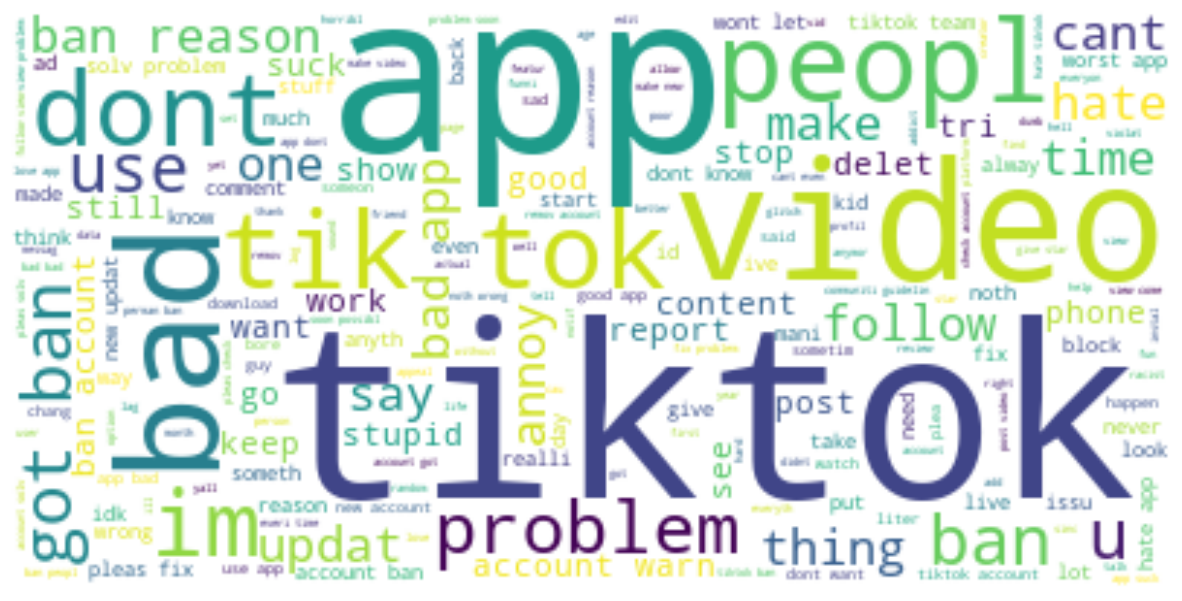

In [12]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Summary

- So this is how to analyze the sentiments of the TikTok reviews. TikTok is famous for its short videos. People often use this app to watch entertaining and funny videos. Despite its entertaining content, this application is not liked by everyone.